In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
bk=pd.read_csv('Books_Data_Clean.csv')
bk.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
bk.shape

(1070, 15)

In [5]:
 bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [6]:
bk.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [7]:
bk.isnull().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [8]:
bk.dropna(subset='Book Name',inplace=True)

In [9]:
bk.duplicated().sum()

np.int64(0)

In [11]:
bk.nunique()

index                  1047
Publishing Year         149
Book Name              1045
Author                  722
language_code             8
Author_Rating             4
Book_average_rating     133
Book_ratings_count     1041
genre                     4
gross sales             813
publisher revenue       595
sale price              146
sales rank              849
Publisher                 9
units sold              485
dtype: int64

In [14]:
bk=bk[bk['Publishing Year']>=1900]

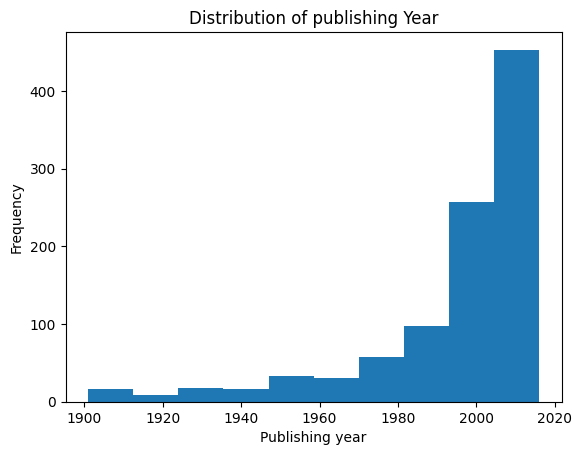

In [15]:
plt.hist(bk['Publishing Year'])
plt.xlabel('Publishing year')
plt.ylabel('Frequency')
plt.title('Distribution of publishing Year')
plt.show()

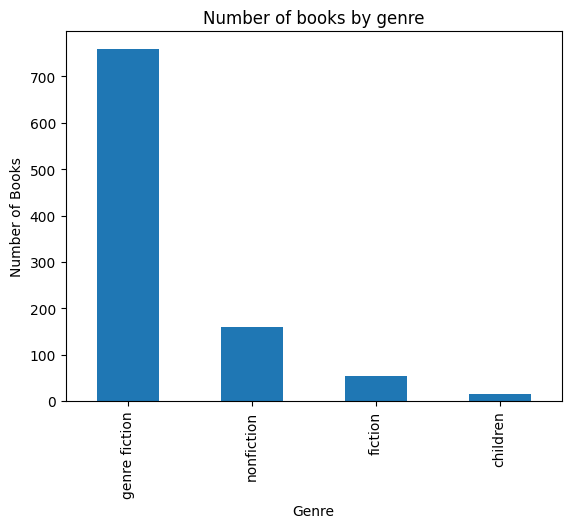

In [17]:
bk['genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.title('Number of books by genre')
plt.show()


In [19]:
bk.groupby('Author')['Book_average_rating'].mean().sort_values(ascending=False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

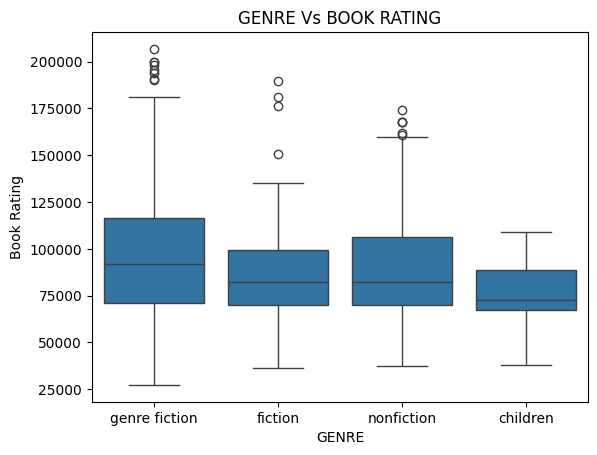

In [22]:
sns.boxplot(x='genre',y='Book_ratings_count',data=bk)
plt.xlabel("GENRE")
plt.ylabel("Book Rating")
plt.title("GENRE Vs BOOK RATING")
plt.show()
          
 

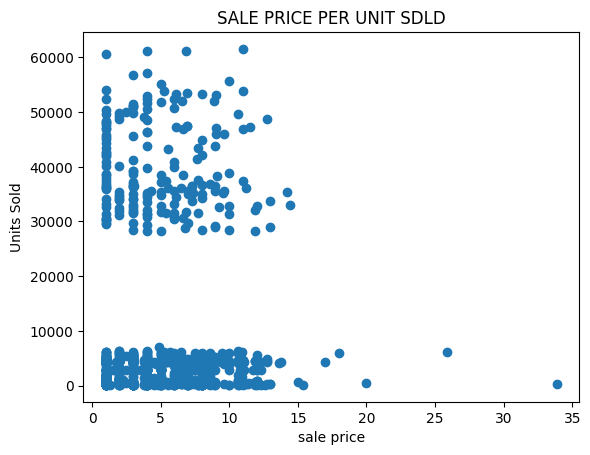

In [27]:
plt.scatter(bk['sale price'],bk['units sold'])
plt.xlabel('sale price')
plt.ylabel('Units Sold')
plt.title('SALE PRICE PER UNIT SDLD')
plt.show()

In [32]:
lang=bk['language_code'].value_counts().sort_values(ascending=True)

In [33]:
lang

language_code
nl         1
spa        2
ara        2
fre        4
en-CA      7
en-GB     29
en-US    226
eng      670
Name: count, dtype: int64

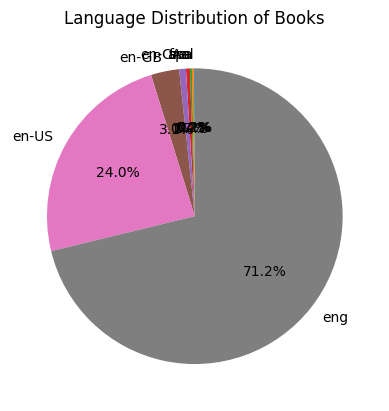

In [37]:
plt.pie(lang,labels=lang.index,startangle=90,autopct="%1.1f%%")
plt.title("Language Distribution of Books")
plt.show()

In [43]:
bk.groupby("Publisher ")['publisher revenue'].sum().sort_values(ascending=False)


Publisher 
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

In [51]:
bk.groupby('Author_Rating')['Book_ratings_count'].sum()

Author_Rating
Excellent       28158413
Famous           4718172
Intermediate    58406557
Novice           2444917
Name: Book_ratings_count, dtype: int64

In [52]:
bk.groupby('language_code').size().sort_values(ascending=False)

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
ara        2
spa        2
nl         1
dtype: int64

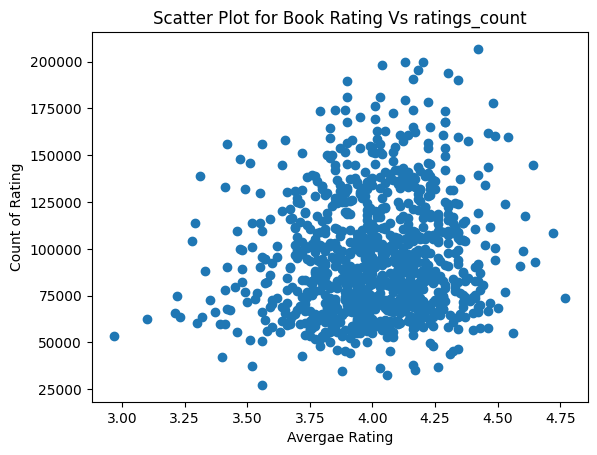

In [56]:
plt.scatter(bk['Book_average_rating'],bk['Book_ratings_count'])
plt.xlabel("Avergae Rating")
plt.ylabel("Count of Rating")
plt.title('Scatter Plot for Book Rating Vs ratings_count')
plt.show()

In [57]:
total_gross_sales_by_author=bk.groupby('Author')['gross sales'].sum()

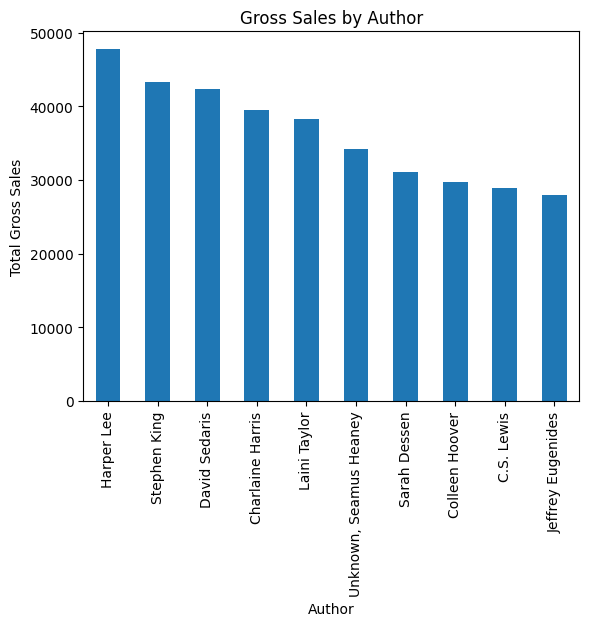

In [59]:
total_gross_sales_by_author.sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Author')
plt.ylabel('Total Gross Sales')
plt.title('Gross Sales by Author')
plt.show()

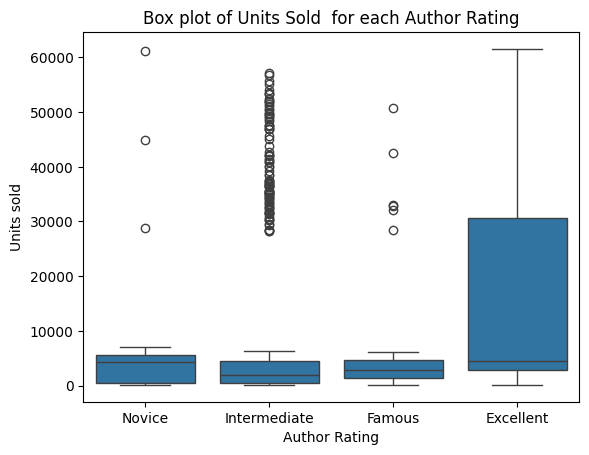

In [62]:
sns.boxplot(x="Author_Rating", y="units sold", data=bk)
plt.xlabel('Author Rating')
plt.ylabel('Units sold')
plt.title('Box plot of Units Sold  for each Author Rating')
plt.show()

Text(0.5, 1.0, 'Total Units Sold Over the Years')

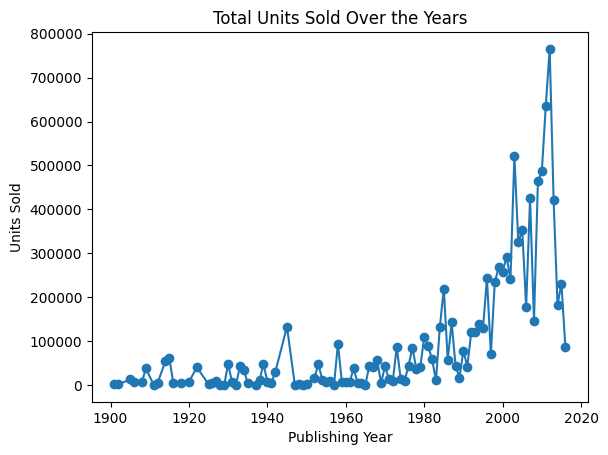

In [64]:
bk.groupby('Publishing Year')['units sold'].sum().plot(kind='line',marker='o')
plt.xlabel('Publishing Year')
plt.ylabel('Units Sold')
plt.title("Total Units Sold Over the Years")